In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


In [26]:
from google.colab import files
uploaded = files.upload()


Saving Zomato Restaurant reviews.csv.csv to Zomato Restaurant reviews.csv (1).csv


In [27]:
import pandas as pd
df = pd.read_csv('Zomato Restaurant reviews.csv.csv', encoding='utf-8')
df.columns = df.columns.str.lower().str.strip()
df.head()


,restaurant,reviewer,review,rating,metadata,time,pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [28]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   restaurant  10000 non-null  object
 1   reviewer    9962 non-null   object
 2   review      9955 non-null   object
 3   rating      9962 non-null   object
 4   metadata    9962 non-null   object
 5   time        9962 non-null   object
 6   pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


,0
restaurant,0
reviewer,38
review,45
rating,38
metadata,38
time,38
pictures,0


rating
5.000000    3832
4.000000    2373
1.000000    1735
3.000000    1193
2.000000     684
4.500000      69
3.500000      47
3.601044      39
2.500000      19
1.500000       9
Name: count, dtype: int64


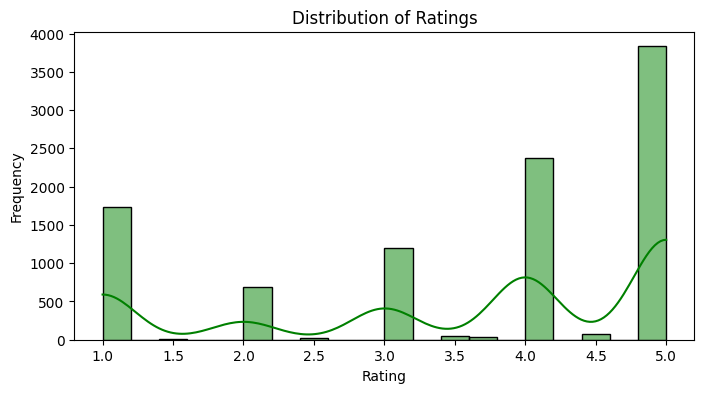

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
print(df['rating'].value_counts())
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating'].fillna(df['rating'].mean(), inplace=True)

plt.figure(figsize=(8,4))
sns.histplot(df['rating'], bins=20, kde=True, color='green')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


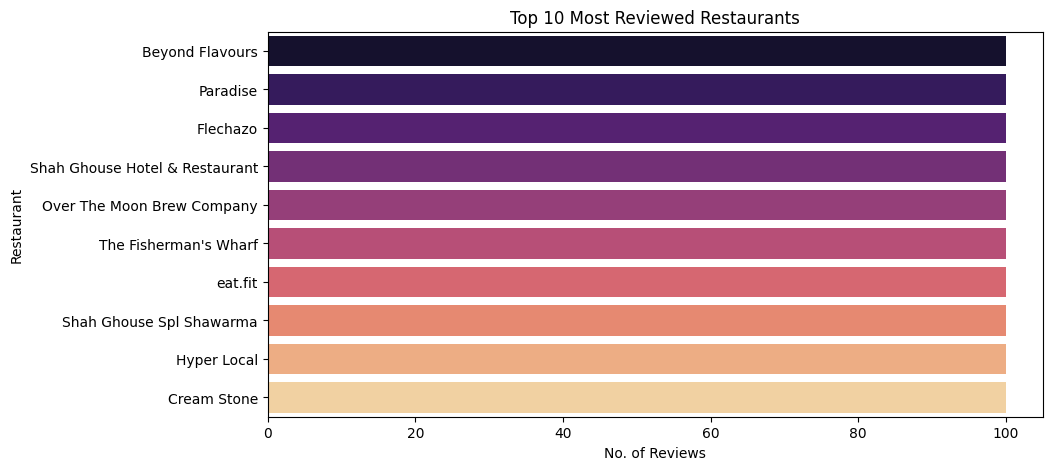

In [31]:
  top_restaurants = df['restaurant'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_restaurants.values, y=top_restaurants.index, palette="magma")
plt.title("Top 10 Most Reviewed Restaurants")
plt.xlabel("No. of Reviews")
plt.ylabel("Restaurant")
plt.show()


In [37]:
import re

def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    return text

df['clean_review'] = df['review'].apply(clean_text)


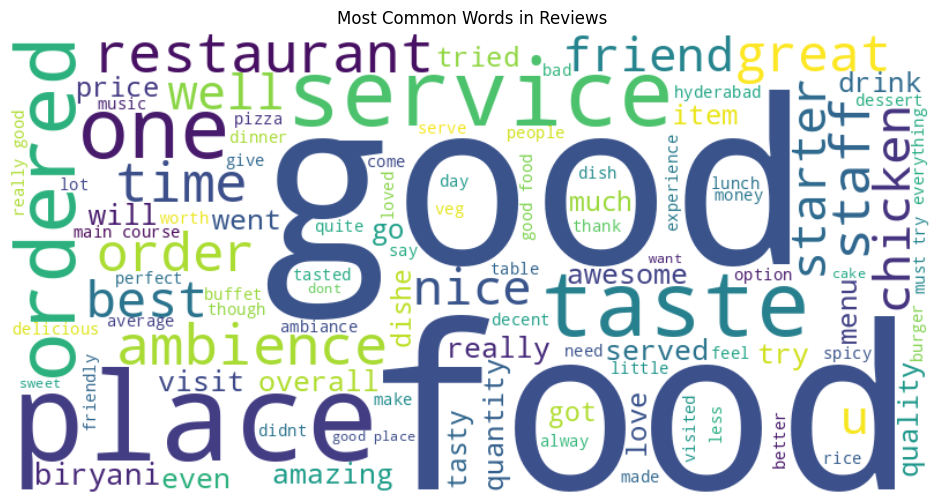

In [38]:
from wordcloud import WordCloud, STOPWORDS

all_words = ' '.join(df['clean_review'])

wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      max_words=100,
                      stopwords=STOPWORDS).generate(all_words)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Reviews")
plt.show()


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')
X = vectorizer.fit_transform(df['clean_review'])
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
df['cluster'] = kmeans.fit_predict(X)
df['cluster'].value_counts()


,count
cluster,
1,4599
0,3648
2,1325
3,428


In [42]:
for i in range(4):
    print(f"\n=== Cluster {i} Sample Reviews ===")
    samples = df[df['cluster'] == i]['clean_review'].head(3).values
    for text in samples:
        print("Review:", text)



=== Cluster 0 Sample Reviews ===
Review: the ambience was good food was quite good  had saturday lunch  which was cost effective 
good place for a sate brunch one can also chill with friends and or parents
waiter soumen das was really courteous and helpful
Review: ambience is too good for a pleasant evening service is very prompt food is good over all a good experience soumen das  kudos to the service
Review: a must try great food great ambience thnx for the service by pradeep and subroto my personal recommendation is penne alfredo pasta  also the music in the background is amazing

=== Cluster 1 Sample Reviews ===
Review: we ordered corn cheese balls manchow soup and paneer shashlik sizzler the sizzler was stale paneer was smelling and the waiter was so impolite to even accept the mistake never going again
Review: beautiful cozy and classy at the same time this place is truly recommended for your special days with  percent corporate discounts you can treat your cotorie well without b

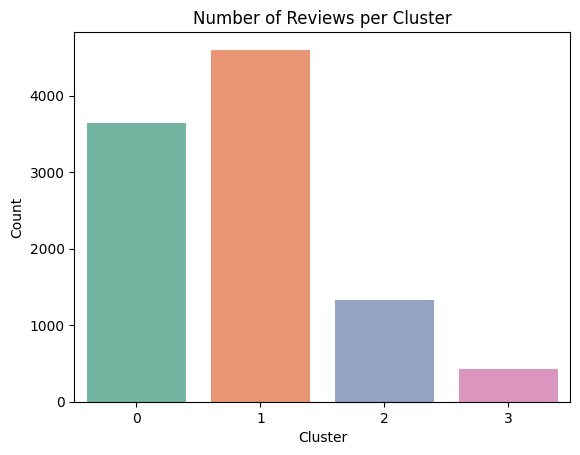

In [43]:
sns.countplot(data=df, x='cluster', palette='Set2')
plt.title("Number of Reviews per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()
